In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [9]:
def plotAudio3(signal,samplingRate,title):
    
    # this version expects the audio file to have already been opened by librosa
    
    # Adjust the x-axis to represent time
    time=np.arange(0,signal.shape[0])/samplingRate
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(signal))
    sigNew = signal / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Plot the signal using the x and y axis variables    
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [10]:
def plotAudioFreqDomain(signal,samplingRate,title,winSize,specType):
    # create a normalized spectrogram with a small window size (256)
    spec2 = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)

    # plot the second spectogram with a linear frequency scaling
    librosa.display.specshow(spec2, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

In [20]:
def additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent):

    # generate list of harmonics
    harmonics = np.arange(1,numHarmonics+1,seqHarm)
    
    # create a time series from 0 to 1 the inputted length    
    timeSeries = np.linspace(0, 1, samplingRate)
    
    # create a cosine wave for the fundamental    
    signal = np.cos(2.0 * np.pi * frequency * timeSeries)

    # add harmonics based on the those specified in the variable 'harmonics'
    for harm in harmonics:
        signal = signal + np.cos(2.0 * np.pi * frequency * harm * timeSeries)/harm**ampExponent     
    
    # scale the signal to between -1 and 1
    excursion=max(abs(signal))
    signal = signal / excursion
    
    # plot signal
    plt.plot(timeSeries,signal)
    plt.xlabel('Time (Sec)')
    plt.ylabel('Amplitude')
    plt.title('additiveSynthesis')
    plt.plot
        
    return signal

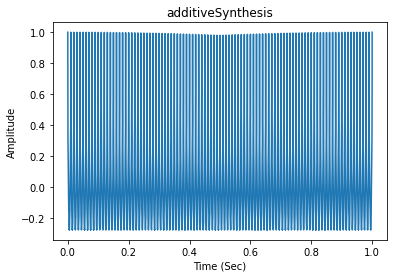

In [34]:
def makeWaveforms(frequency,samplingRate,numHarmonics,waveType):
    if waveType == 'sawtooth':
        seqHarm = 1
        ampExponent = 1
    elif waveType == 'square': 
        seqHarm = 2
        ampExponent = 1
    elif waveType == 'triangle':
        seqHarm = 2
        ampExponent = 2
    else: 
        numHarmonics = 1
        seqHarm = 1
        ampExponent = 1

signal = additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent)

# play signal
IPython.display.Audio(data=signal, rate=samplingRate)

In [35]:
def visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType,winSize,specType):
    makeWavefrom(frequency,samplingRate,numHarmonics,waveType)
    plotAudio3(signal,samplingRate,title)
    plotAudioFreqDomain(signal,samplingRate,title,winSize,specType)

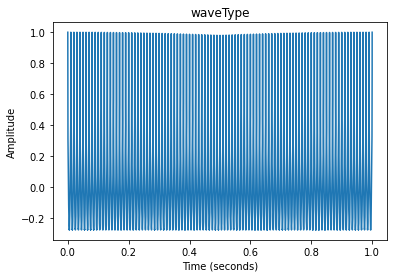

C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


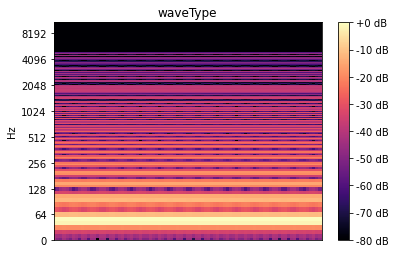

In [36]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sine'
winSize = 1024
specType = 'log'
visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType,winSize,specType)
IPython.display.Audio(data=signal, rate=samplingRate)

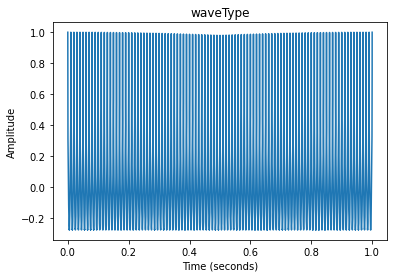

C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


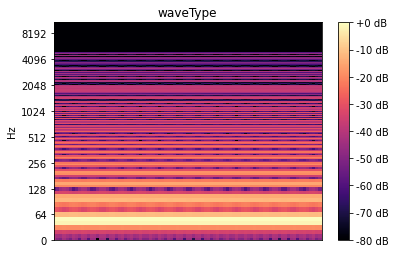

In [38]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sawtooth'
winSize = 1024
specType = 'log'
visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType,winSize,specType)
IPython.display.Audio(data=signal, rate=samplingRate)

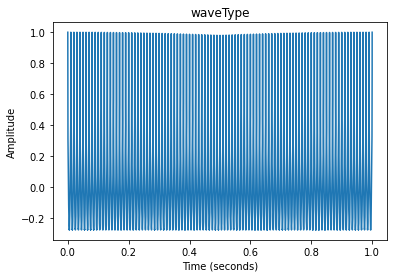

C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


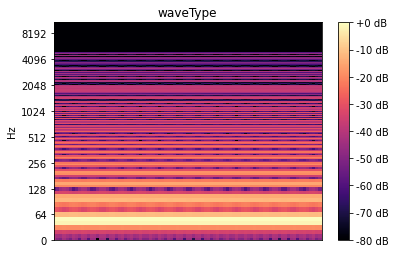

In [39]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'triangle'
winSize = 1024
specType = 'log'
visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType,winSize,specType)
IPython.display.Audio(data=signal, rate=samplingRate)

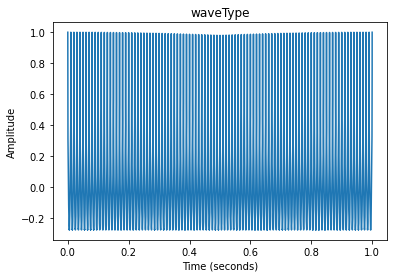

C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\izzyp\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


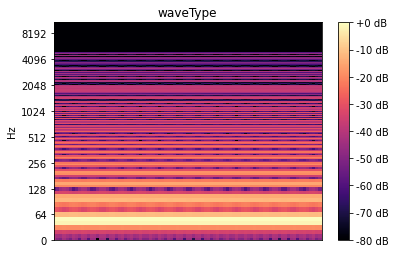

In [40]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'square'
winSize = 1024
specType = 'log'
visualizeWaveforms(frequency,samplingRate,numHarmonics,waveType,winSize,specType)
IPython.display.Audio(data=signal, rate=samplingRate)